# CSE151A HW1: Kth Nearest Neighbor
Xiaochen Li

## Answers:
According to validation, the KNN Classifier works best when k = 1, the test error is 0.094
The table containning relavent info is given below:

In [10]:
err_df

,TRAIN_ERR,VALIDATE_ERR,TEST_ERR
1,0.0000,0.082,0.094
5,0.0565,0.095,0.098
9,0.0685,0.104,0.101
15,0.0925,0.108,0.114


After Projction, the accuracy on training, validation sets both decrease, the final testing is less accurate, thus have a higher testing error. But the run time of predicting decreases significantly. The relavent info is given below: 
This time, the best k is when it equates 15, with 0.289 validation error, and 0.296 testing error

In [11]:
proj_err_df

,PROJ_TRAIN_ERR,PROJ_VALIDATE_ERR,PROJ_TEST_ERR
1,0.0000,0.320,0.314
5,0.1945,0.299,0.301
9,0.2305,0.302,0.293
15,0.2570,0.289,0.296


In [1]:
## Packages
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt 



In [2]:
## Global Variables

# file path
DATA_PATH = "./data/"
VALIDATE_PATH = "pa1validate.txt"
TRAIN_PATH = "pa1train.txt"
TEST_PATH = "pa1test.txt"

# data
TRAIN_DATA = np.genfromtxt(DATA_PATH + TRAIN_PATH)
VALIDATE_DATA = np.genfromtxt(DATA_PATH + VALIDATE_PATH)
TEST_DATA = np.genfromtxt(DATA_PATH + TEST_PATH)

# vars
LABEL_IDX = 784


# Projections
PROJ_PATH = "projection.txt"
PROJ_MAT = np.genfromtxt(DATA_PATH + PROJ_PATH)

### KNN CLASS

In [3]:
class KNN_classifier:
    def __init__(self):
        pass
    
    def train(self,X_train, y_train):
        ## No training, simply memorization
        self.X_train = X_train
        self.y_train = y_train
     
    def __l2_distance(self,vector1, vector2):
        ## vectorized version
        return np.linalg.norm((vector1-vector2), axis=1)
    
    
    def __get_knn_helper(self, vector):
        dis = pd.Series(self.__l2_distance(self.X_train, vector))
        knn = dis.sort_values()[:self.k]
        label = self.y_train[knn.index]
        maj_class = np.bincount(label).argmax()
        return maj_class
                
    def get_knn(self, sample, k):
        
        self.k = k
        knn_arr = np.array(list(map(self.__get_knn_helper, sample)))
        
        return knn_arr
        
    
    def predict(self, sample, k=1):
        return self.get_knn(sample,k)
        
  
    def train_error(self, k=1):
        prediction = self.predict(self.X_train,k)
        score = np.sum(prediction != self.y_train) /  len(self.y_train)
        return score
        
    
    def test_error(self, sample_vector, sample_label, k=1):
        prediction = self.predict(sample_vector,k)
        score = np.sum((prediction != sample_label )) / len(sample_label)
        return score
        
  
        

In [4]:
X_train, y_train = TRAIN_DATA[:,:-1],TRAIN_DATA[:,LABEL_IDX]
y_train = y_train.astype(int)
X_validate, y_validate = VALIDATE_DATA[:,:-1], VALIDATE_DATA[:,LABEL_IDX]
y_validate.astype(int)
X_test, y_test = TEST_DATA[:,:-1],TEST_DATA[:,LABEL_IDX]
y_test.astype(int)
...

Ellipsis

### PERFORMANCE

In [5]:
knn = KNN_classifier()
knn.train(X_train,y_train)
train_errors =[]
validate_errors = []
test_errors = []
for i in [1,5,9,15]:
    err = knn.train_error(i)
    train_errors.append(err)
    err = knn.test_error(X_validate, y_validate,i)
    validate_errors.append(err)
    err =  knn.test_error(X_test, y_test,i)
    test_errors.append(err)

error_data = {"TRAIN_ERR": train_errors, 
              "VALIDATE_ERR": validate_errors, 
              "TEST_ERR": test_errors}
index = [1,5,9,15]

err_df = pd.DataFrame(error_data, index)
err_df

,TRAIN_ERR,VALIDATE_ERR,TEST_ERR
1,0.0000,0.082,0.094
5,0.0565,0.095,0.098
9,0.0685,0.104,0.101
15,0.0925,0.108,0.114


In [6]:
def projection(data_set,projection_matrix = PROJ_MAT):
    return np.dot(data_set,projection_matrix)
X_train_proj = projection(X_train)
X_validate_proj = projection(X_validate)
X_test_proj = projection(X_test)

### PERFORMANCE AFTER PROJECTION

In [7]:
knn_proj = KNN_classifier()
knn_proj.train(X_train_proj,y_train)
proj_train_errors =[]
proj_validate_errors = []
proj_test_errors = []
for i in [1,5,9,15]:
    err = knn_proj.train_error(i)
    proj_train_errors.append(err)
    err = knn_proj.test_error(X_validate_proj, y_validate,i)
    proj_validate_errors.append(err)
    err =  knn_proj.test_error(X_test_proj, y_test,i)
    proj_test_errors.append(err)

proj_error_data = {"PROJ_TRAIN_ERR": proj_train_errors, 
              "PROJ_VALIDATE_ERR": proj_validate_errors, 
              "PROJ_TEST_ERR": proj_test_errors}
proj_index = [1,5,9,15]

proj_err_df = pd.DataFrame(proj_error_data, index)
proj_err_df

,PROJ_TRAIN_ERR,PROJ_VALIDATE_ERR,PROJ_TEST_ERR
1,0.0000,0.320,0.314
5,0.1945,0.299,0.301
9,0.2305,0.302,0.293
15,0.2570,0.289,0.296


### PERFORMANCE COMPARISION

In [8]:
df = err_df.join(proj_err_df)
df

,TRAIN_ERR,VALIDATE_ERR,TEST_ERR,PROJ_TRAIN_ERR,PROJ_VALIDATE_ERR,PROJ_TEST_ERR
1,0.0000,0.082,0.094,0.0000,0.320,0.314
5,0.0565,0.095,0.098,0.1945,0.299,0.301
9,0.0685,0.104,0.101,0.2305,0.302,0.293
15,0.0925,0.108,0.114,0.2570,0.289,0.296


<IPython.core.display.Javascript object>


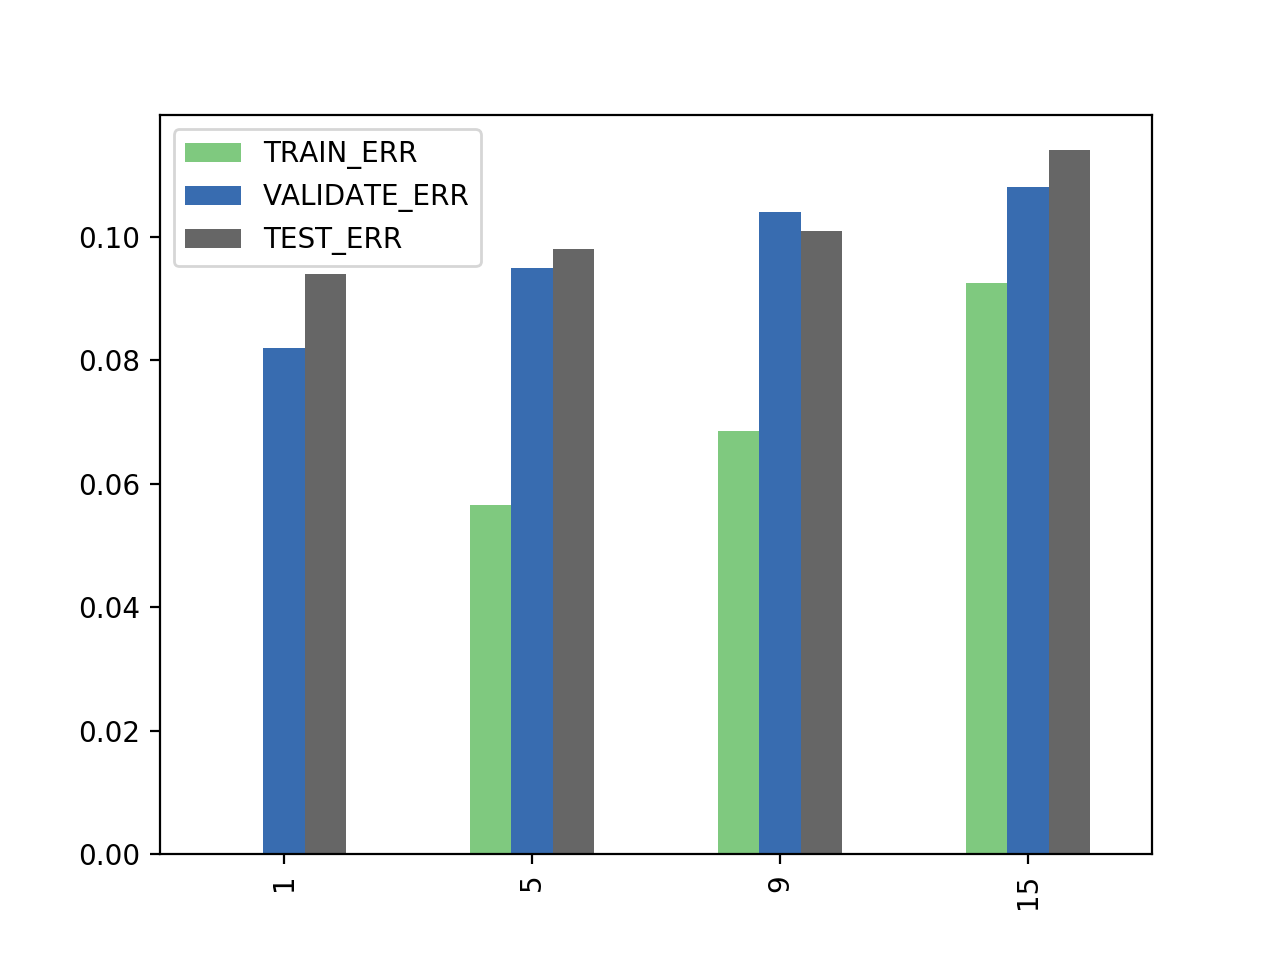

<IPython.core.display.Javascript object>


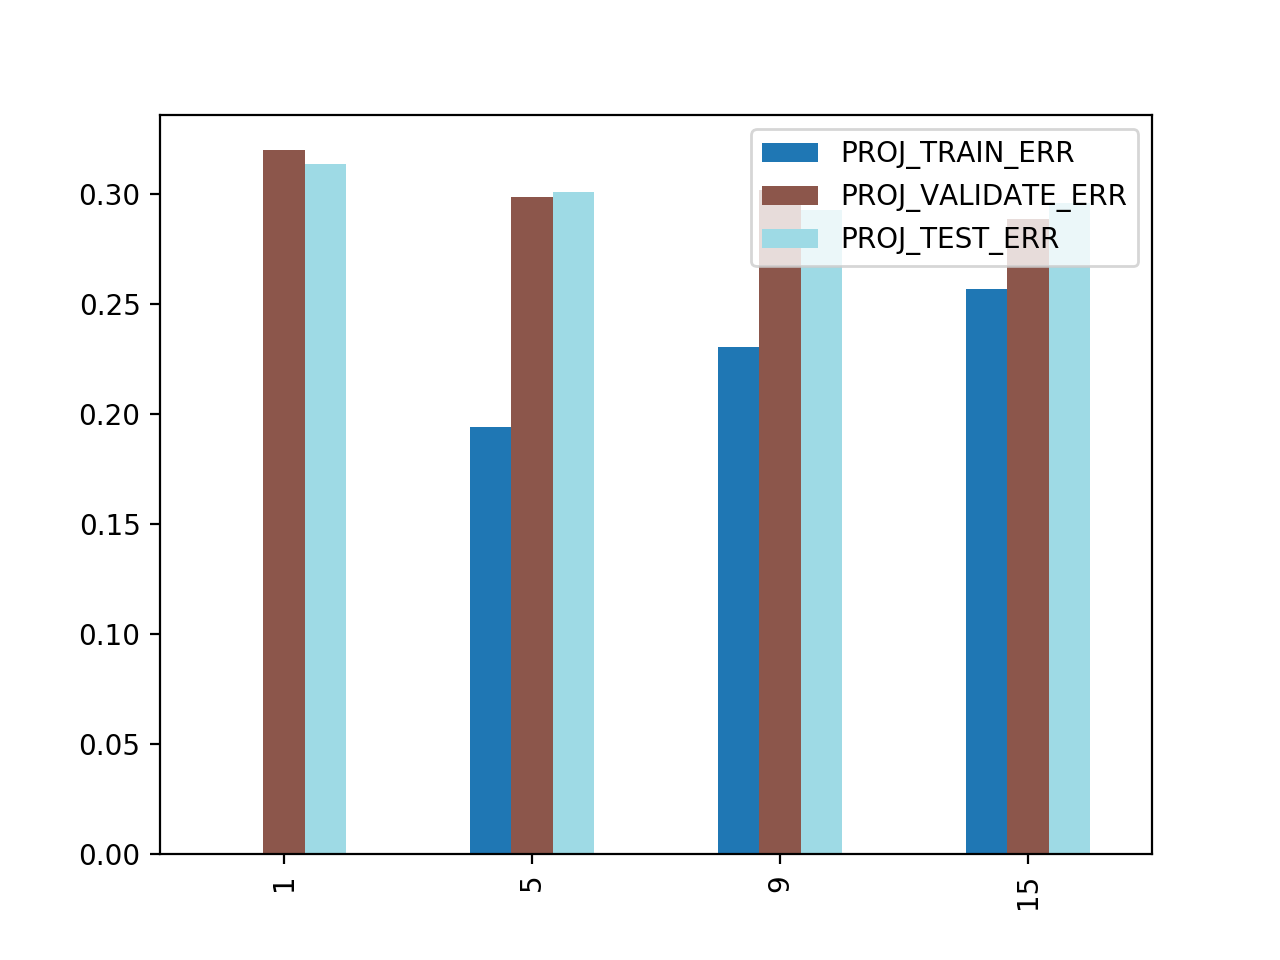

<IPython.core.display.Javascript object>


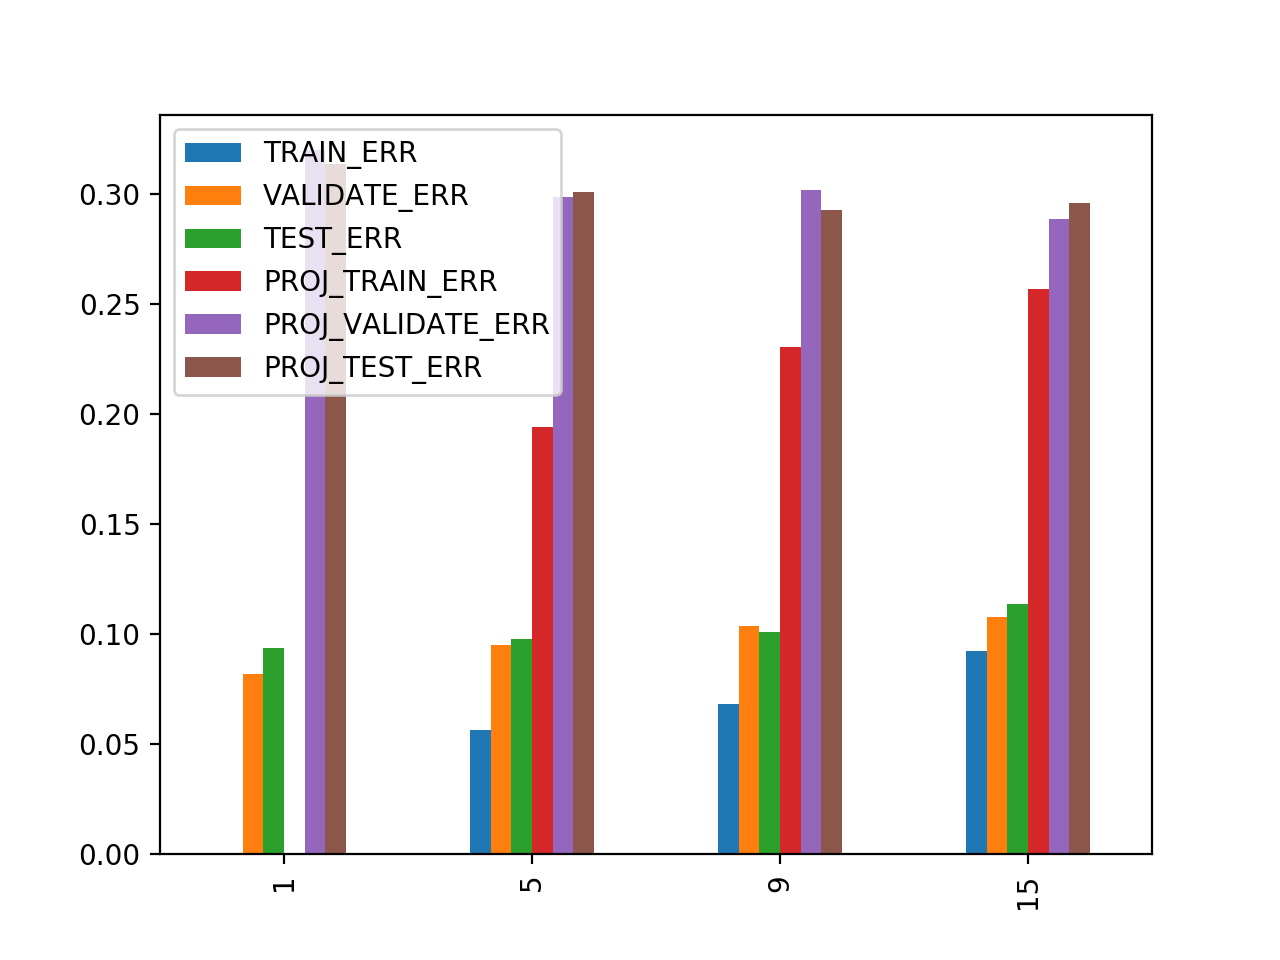

In [9]:
err_df.plot(kind="bar",cmap=plt.get_cmap("Accent"))
proj_err_df.plot(kind='bar',cmap=plt.get_cmap("tab20"))
df.plot(kind="bar")
plt.show()